
----------------------------Reduce Dimension---------------------------
Full iris dataframe:
      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Dataframe iris with only first 4 columns (print 6 fi

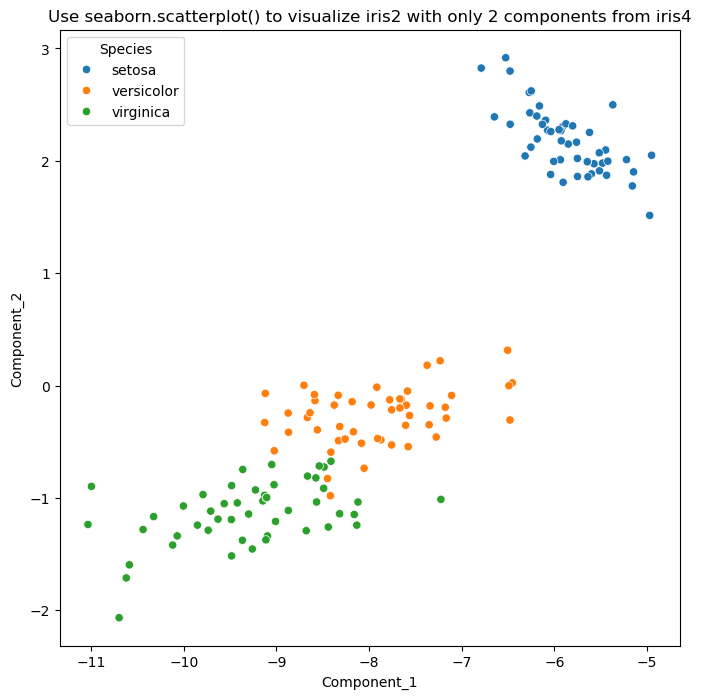

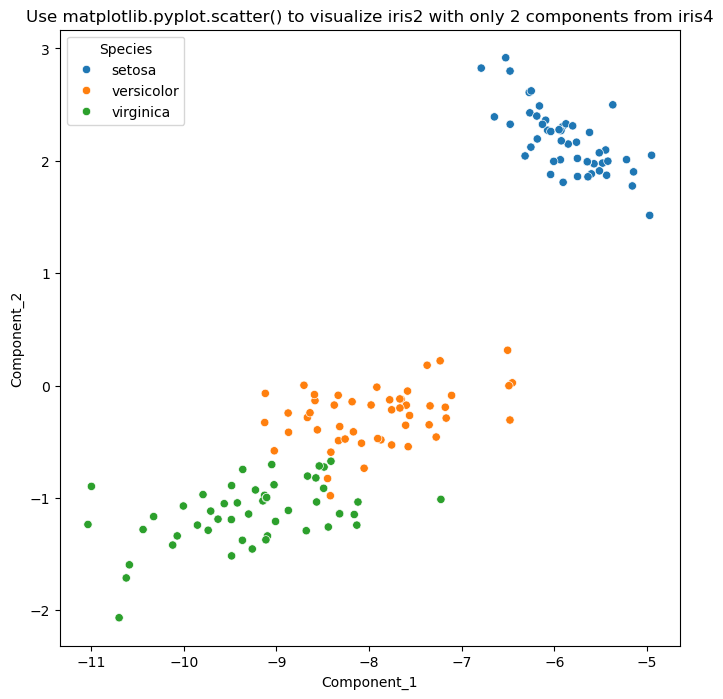

In [3]:
"""=============================================================================
   Ex4: SVD Demensionality Reduction
   Câu 1: 
      a) Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
      b) Phân tích SVD: U, s, VT từ dataframe, 
      c) Giảm chiều còn 2 components
      d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species) 
============================================================================="""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd,inv
import seaborn as sns

print('\n----------------------------Reduce Dimension---------------------------')

#a) Read the iris.csv into a dataframe, but take only first 4 columns
folder = 'data_Buoi4/'
iris = pd.read_csv(folder+'iris.csv')
print('Full iris dataframe:\n',iris)

iris4 = iris.iloc[:,:4]
print('\nDataframe iris with only first 4 columns (print 6 first rows):\n',iris4.head(6))

#b) Do SVD: U,s,Vt analysis for iris4
U,s,Vt = svd(iris4)
print('\nThe U'+str(U.shape)+' orthogonal matrix of iris4 =\n',U)
print('\nThe s sqrt(eigenvalues) of iris4 =', s)
print('\nThe Vt'+str(Vt.shape)+' normalized orthogonal matrix of iris4 =\n',Vt)

#c) Reduce from 4 components to only 2 components (or reduce form 4 dimensions to 2 dimension):
##Create S matrix containing zeros
if (iris4.shape[0] == iris4.shape[1]):
    S = np.diag(s)
else:
    S = np.zeros_like(iris4)
    S[:len(s),:len(s)] = np.diag(s)

print('\nThe S'+str(S.shape)+'  matrix of iris4 =\n',S[:len(s),:len(s)])

##Using only 2 components S(150,2) and Vt(2,150)
S_2 = S[:,:2] #150x2
Vt_2 = Vt[:2,:] #2x4
V_2 = Vt_2.T #4x2

##To project 4-dimension dataframe into 2 dimensions only, use formula iris4.V (where V = Vt.T)
##   But iris4 = U.S.Vt so iris4.V = U.S.Vt.V = U.S
##   So in conclusion, we have two ways to project it into two less direction components = U.S = iris4.V

print('\nThe iris4 with only 2 components = U @ S_2 = (150x150 @ 150x2) =\n',pd.DataFrame(U@S_2)) 
# 150x150 @ 150x2 = 150x2
# pd.DataFrame to convert in into dataframe so that it will display more compact

print('\nThe iris4 with only 2 components = iris4 @ V_2 = (150x4 @ 4x2) =\n',iris4@V_2) 
# 150x4 @ 4x2 = 150x2
# Since iris4 is a dataframe, the result of iris4@V_2 is also a dataframe, no need to convert

#d) Visualize the data after reducing 2 components
iris2 = pd.DataFrame(iris4@V_2) #create iris2 dataframe with only 2 components from iris4

##Name the two columns of iris2 as Component_1 and Component_2
iris2.columns = ['Component_1','Component_2']

##Add the 'species' columns for iris2
iris2['Species'] = iris['species']

print('\nThe iris2 with only 2 components of iris4 (first 5 lines):\n',iris2.head(5))

##Use seaborn.scatterplot()
plt.figure(figsize=(8,8))
plt.title('Use seaborn.scatterplot() to visualize iris2 with only 2 components from iris4')
sns.scatterplot(x=iris2['Component_1'], y=iris2['Component_2'], hue=iris2['Species'] )
plt.show()

##Use plt.scatter()
plt.figure(figsize=(8,8))
plt.title('Use matplotlib.pyplot.scatter() to visualize iris2 with only 2 components from iris4')
sns.scatterplot(x=iris2['Component_1'], y=iris2['Component_2'], hue=iris2['Species'] )
plt.show()